In [5]:
### Data Modeling with Ensembles

In [1]:
import sys
sys.executable

'C:\\Users\\HPTav\\Miniconda3\\envs\\conda_erml\\python.exe'

In [6]:
### Importing required library 

In [2]:
# ------------------------------ Import Libraries -----------------------------
import glob  # Unix style pathname pattern expansion
import os  # Miscellaneous operating system interfaces
from pathlib import Path  # Object-oriented filesystem paths
import numpy as np  # Fundamental package needed for scientific computing
import pandas as pd  # Python Data Analysis Library
from pycaret.classification import *
import shap

In [7]:
#### First, we define the relative paths:

In [3]:
# -------------------------------- Config Paths -------------------------------
cwd = Path.cwd()
data_path = (cwd / './erml_data/').resolve()
print(cwd)

c:\uni_siegen\ERML


In [4]:
#### Then, we load and prepare data for models:

In [11]:
import pickle5 as pickle

In [12]:
# ------------------------------- Read All Data -------------------------------
path = os.path.join((data_path / './').resolve())

all_files = glob.glob(path + "/*.pkl")
print(data_path)
li = []
for filename in all_files:
    df = pd.read_pickle(filename)
    # because sensor data are sampled at 250 Hz we average it on every 1 second
    df = df.groupby(np.arange(len(df))//250).mean()
    li.append(df)
df_total = pd.concat(li, axis=0, ignore_index=True)
print(df_total.head())

C:\uni_siegen\ERML\erml_data


ValueError: unsupported pickle protocol: 5

In [9]:
print(df_total.shape)

(64074, 11)


In [10]:
print(df_total.describe())

        Temperature           GSR          EOG1          EOG2          EEG1  \
count  64074.000000  6.407400e+04  6.407400e+04  6.407400e+04  6.407400e+04   
mean   15273.307119  9.962838e+06  6.596429e+06  9.198664e+06  1.065647e+07   
std      909.533774  6.667136e+06  7.722094e+06  7.967553e+06  4.072698e+06   
min     4684.336000  1.204272e+04  5.884680e+02  5.544880e+02  9.051940e+03   
25%    15299.264000  1.872706e+06  2.800430e+05  3.998282e+05  9.029900e+06   
50%    15367.424000  1.442774e+07  9.051543e+05  1.623626e+07  1.158940e+07   
75%    15418.798000  1.576669e+07  1.639481e+07  1.677547e+07  1.348757e+07   
max    59695.200000  1.676555e+07  1.677648e+07  1.677644e+07  1.675357e+07   

               EEG2       RED_RAW         IR_RAW       Arousal     Dominance  \
count  6.407400e+04  64074.000000   64074.000000  64074.000000  64074.000000   
mean   1.042874e+07  55913.466408   78635.855454      5.322658      5.118706   
std    4.785804e+06  15602.966669   16450.502603

In [11]:
print(df_total.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64074 entries, 0 to 64073
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  64074 non-null  float64
 1   GSR          64074 non-null  float64
 2   EOG1         64074 non-null  float64
 3   EOG2         64074 non-null  float64
 4   EEG1         64074 non-null  float64
 5   EEG2         64074 non-null  float64
 6   RED_RAW      64074 non-null  float64
 7   IR_RAW       64074 non-null  float64
 8   Arousal      64074 non-null  int64  
 9   Dominance    64074 non-null  int64  
 10  Valence      64074 non-null  int64  
dtypes: float64(8), int64(3)
memory usage: 5.4 MB
None


In [7]:
### setup model for Arousal

In [6]:
# ---------------------------- setup for ml models ----------------------------
clf1 = setup(
    data = df_total,
    target = 'Arousal',
    normalize=True,
    feature_selection=True,
    remove_outliers=True
)

,Description,Value
0,session_id,6556
1,Target,Arousal
2,Target Type,Multiclass
3,Label Encoded,"1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8"
4,Original Data,"(64074, 11)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


In [7]:
#### find the best model for Arousal

In [7]:
best_model_arousal = compare_models(fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9827,0.9997,0.9881,0.9827,0.9827,0.9798,0.9798,57.0020
knn,K Neighbors Classifier,0.9805,0.9994,0.9867,0.9806,0.9805,0.9773,0.9773,0.6320
et,Extra Trees Classifier,0.9782,0.9900,0.9855,0.9782,0.9782,0.9746,0.9746,1.1240
rf,Random Forest Classifier,0.9780,0.9996,0.9854,0.9781,0.9780,0.9744,0.9744,2.3320
lightgbm,Light Gradient Boosting Machine,0.9780,0.9996,0.9853,0.9780,0.9780,0.9743,0.9743,3.8120
dt,Decision Tree Classifier,0.9758,0.9869,0.9832,0.9759,0.9758,0.9717,0.9718,0.2660
lr,Logistic Regression,0.6471,0.9276,0.7059,0.6527,0.6476,0.5867,0.5874,5.7920
svm,SVM - Linear Kernel,0.6234,0.0000,0.6785,0.6348,0.6227,0.5588,0.5609,0.5160
ridge,Ridge Classifier,0.5644,0.0000,0.5471,0.6057,0.5556,0.4850,0.4878,0.0700
lda,Linear Discriminant Analysis,0.5497,0.8900,0.6233,0.5689,0.5458,0.4765,0.4789,0.1680


In [ ]:
#### Make model for Arousal

In [7]:
model_arousal = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9819,0.9997,0.9877,0.9819,0.9819,0.9789,0.9789
1,0.9817,0.9997,0.9873,0.9818,0.9817,0.9786,0.9787
2,0.9836,0.9997,0.9891,0.9836,0.9836,0.9808,0.9808
3,0.9801,0.9996,0.9859,0.9801,0.9800,0.9767,0.9767
4,0.9808,0.9997,0.9873,0.9811,0.9808,0.9775,0.9776
5,0.9843,0.9997,0.9893,0.9843,0.9843,0.9816,0.9817
6,0.9793,0.9996,0.9855,0.9794,0.9794,0.9759,0.9759
7,0.9845,0.9998,0.9883,0.9847,0.9845,0.9819,0.9820
8,0.9822,0.9997,0.9871,0.9822,0.9821,0.9792,0.9792
9,0.9833,0.9997,0.9888,0.9833,0.9833,0.9805,0.9805


In [ ]:
#### plot AUC for Arousal

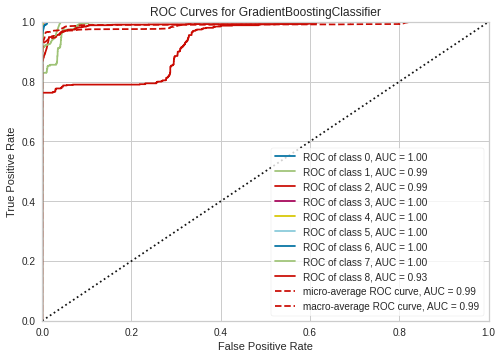

In [8]:
plot_model(model_arousal)

In [ ]:
#### plot confusion matrix for Arousal

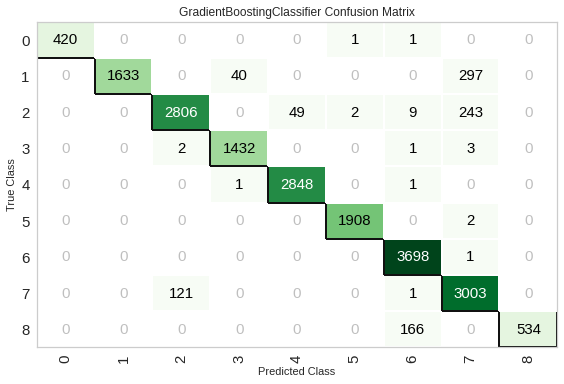

In [9]:
plot_model(model_arousal, 'confusion_matrix') 

In [ ]:
#### make predictions for Arousal

In [13]:
predictions = predict_model(model_arousal)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9510,0.9950,0.9383,0.9546,0.9506,0.9430,0.9436


In [ ]:
#### finalize model for Arousal

In [ ]:
finalize_model(model_arousal)

In [ ]:
#### save model for Arousal

In [ ]:
save_model(model_arousal, 'model_arousal_gbc')

In [ ]:
### setup model for Dominance

In [12]:
clf2 = setup(
    data = df_total,
    target = 'Dominance',
    normalize=True,
    feature_selection=True,
    remove_outliers=True
)

,Description,Value
0,session_id,1244
1,Target,Dominance
2,Target Type,Multiclass
3,Label Encoded,"1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8"
4,Original Data,"(64074, 11)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
### find the best model for Dominance

In [16]:
best_model_dominance = compare_models(fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.6120
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0860
lightgbm,Light Gradient Boosting Machine,0.9998,1.0000,0.9997,0.9998,0.9998,0.9998,0.9998,3.3000
knn,K Neighbors Classifier,0.9993,0.9999,0.9992,0.9993,0.9993,0.9992,0.9992,0.7260
gbc,Gradient Boosting Classifier,0.9991,1.0000,0.9988,0.9991,0.9991,0.9990,0.9990,57.8620
dt,Decision Tree Classifier,0.9982,0.9989,0.9982,0.9982,0.9982,0.9979,0.9979,0.2640
lr,Logistic Regression,0.7283,0.9450,0.7661,0.7347,0.7245,0.6793,0.6811,5.9220
svm,SVM - Linear Kernel,0.6760,0.0000,0.7252,0.6751,0.6695,0.6191,0.6207,0.7220
lda,Linear Discriminant Analysis,0.5484,0.8772,0.5499,0.5820,0.5433,0.4688,0.4719,0.1720
ridge,Ridge Classifier,0.5404,0.0000,0.5187,0.5917,0.5290,0.4504,0.4559,0.1320


In [ ]:
#### Make model for Dominance

In [13]:
model_dominance = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9984,0.9997,0.9976,0.9984,0.9984,0.9981,0.9981
1,0.9998,1.0000,0.9997,0.9998,0.9998,0.9997,0.9997
2,0.9993,1.0000,0.9990,0.9993,0.9993,0.9992,0.9992
3,0.9991,1.0000,0.9992,0.9991,0.9991,0.9989,0.9989
4,0.9993,1.0000,0.9995,0.9993,0.9993,0.9992,0.9992
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9988,1.0000,0.9983,0.9988,0.9988,0.9986,0.9986
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9993,1.0000,0.9990,0.9993,0.9993,0.9992,0.9992
9,0.9993,1.0000,0.9992,0.9993,0.9993,0.9992,0.9992


In [ ]:
#### plot AUC for Dominance

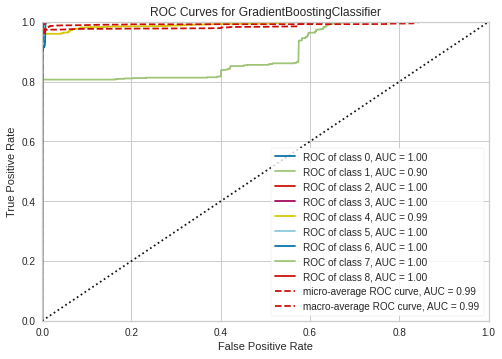

In [14]:
plot_model(model_dominance)

In [ ]:
#### plot confusion matrix for Dominance

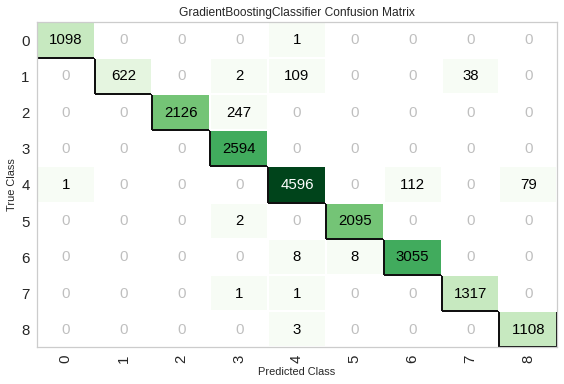

In [15]:
plot_model(model_dominance, 'confusion_matrix')

In [ ]:
#### make predictions for Dominance

In [16]:
predictions = predict_model(model_dominance)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9682,0.9936,0.9613,0.9697,0.9678,0.9627,0.9630


In [ ]:
#### finalize model for Dominance

In [ ]:
finalize_model(model_dominance)

In [ ]:
#### save model for Dominance

In [ ]:
save_model(model_dominance, 'model_dominance_gbc')

In [ ]:
### setup model for Valence

In [17]:
clf3 = setup(
    data = df_total,
    target = 'Valence',
    normalize=True,
    feature_selection=True,
    remove_outliers=True
)

,Description,Value
0,session_id,3454
1,Target,Valence
2,Target Type,Multiclass
3,Label Encoded,"1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8"
4,Original Data,"(64074, 11)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
### find the best model for Valence

In [18]:
best_model_valence = compare_models(fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9827,0.9997,0.9898,0.9827,0.9827,0.9797,0.9797,63.0980
knn,K Neighbors Classifier,0.9813,0.9994,0.9892,0.9813,0.9813,0.9781,0.9781,0.6360
rf,Random Forest Classifier,0.9784,0.9996,0.9878,0.9784,0.9784,0.9747,0.9747,2.2340
et,Extra Trees Classifier,0.9782,0.9897,0.9877,0.9782,0.9782,0.9745,0.9745,1.0720
lightgbm,Light Gradient Boosting Machine,0.9778,0.9996,0.9872,0.9778,0.9778,0.9740,0.9740,3.6160
dt,Decision Tree Classifier,0.9770,0.9872,0.9868,0.9770,0.9770,0.9730,0.9730,0.2400
lr,Logistic Regression,0.8003,0.9649,0.8361,0.8048,0.7996,0.7659,0.7670,5.6320
svm,SVM - Linear Kernel,0.7357,0.0000,0.7920,0.7406,0.7311,0.6914,0.6928,0.4840
lda,Linear Discriminant Analysis,0.6356,0.9160,0.6766,0.6372,0.6342,0.5735,0.5740,0.1940
ridge,Ridge Classifier,0.6234,0.0000,0.6302,0.6394,0.6205,0.5548,0.5561,0.1140


In [ ]:
#### Make model for Valence

In [19]:
model_valence = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9833,0.9997,0.9905,0.9833,0.9833,0.9805,0.9805
1,0.9815,0.9997,0.9892,0.9815,0.9815,0.9783,0.9783
2,0.9840,0.9997,0.9906,0.9840,0.9840,0.9813,0.9813
3,0.9812,0.9997,0.9891,0.9812,0.9812,0.9780,0.9780
4,0.9836,0.9997,0.9904,0.9836,0.9836,0.9807,0.9807
5,0.9810,0.9997,0.9879,0.9812,0.9810,0.9777,0.9778
6,0.9852,0.9997,0.9916,0.9852,0.9852,0.9827,0.9827
7,0.9810,0.9997,0.9887,0.9810,0.9810,0.9777,0.9777
8,0.9803,0.9996,0.9883,0.9803,0.9803,0.9769,0.9769
9,0.9826,0.9997,0.9897,0.9827,0.9826,0.9796,0.9797


/home/maanib/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/maanib/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/maanib/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/maanib/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/ma

In [ ]:
#### plot AUC for Valence

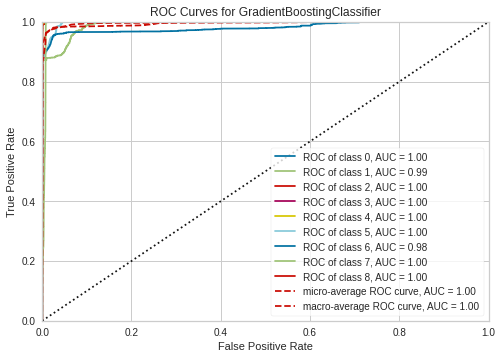

In [20]:
plot_model(model_valence)

In [ ]:
#### plot confusion matrix for Valence

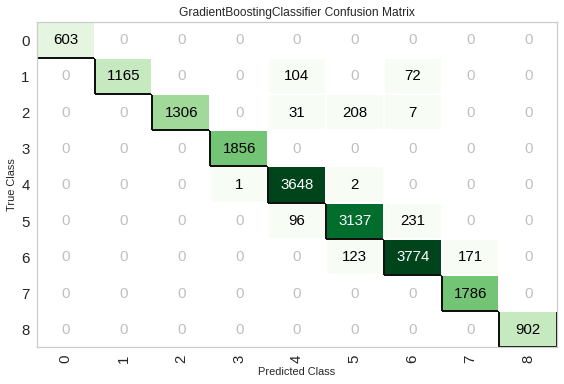

In [21]:
plot_model(model_valence, 'confusion_matrix')

In [ ]:
#### make predictions for Valence

In [22]:
predictions = predict_model(model_valence)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9456,0.9946,0.9492,0.9472,0.9451,0.9362,0.9364


In [ ]:
#### finalize model for Valence

In [ ]:
finalize_model(model_valence)

In [ ]:
#### save model for Valence

In [ ]:
save_model(model_dominance, 'model_valence_gbc')